In [1]:
%matplotlib inline

In [2]:
import logging
import numpy as np

In [30]:
%run utils/data.py
%run config.py

In [4]:
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s : %(levelname)s : %(module)s : %(message)s", datefmt="%d-%m-%Y %H:%M:%S"
)

In [5]:
grid_sizes = load_grid_sizes(GRID_SIZES_FILENAME)
polygons = load_polygons(POLYGONS_FILENAME)

all_images = sorted(set(grid_sizes.index))
train_images = sorted(set(polygons.index))
test_images = sorted(set(all_images) - set(train_images))
logging.info('Train: %s, Test: %s, All: %s', len(train_images), len(test_images), len(all_images))

24-02-2017 23:07:16 : INFO : data : Grid sizes: (450, 2)
24-02-2017 23:07:16 : INFO : data : Polygons: (250, 2)
24-02-2017 23:07:16 : INFO : <ipython-input-5-eb42f286861b> : Train: 25, Test: 425, All: 450


In [43]:
img_id = '6070_2_3' # '6070_2_3' #train_images[0]
logging.info('Image id: %s', img_id)

24-02-2017 23:20:25 : INFO : <ipython-input-43-061fb10a1461> : Image id: 6070_2_3


In [44]:
img_rgb = load_image(os.path.join(IMAGES_THREE_BAND_DIR, '{}.tif'.format(img_id)))
img_m = load_image(os.path.join(IMAGES_SIXTEEN_BAND_DIR, '{}_M.tif'.format(img_id)))
img_a = load_image(os.path.join(IMAGES_SIXTEEN_BAND_DIR, '{}_A.tif'.format(img_id)))
img_pan = load_image(os.path.join(IMAGES_SIXTEEN_BAND_DIR, '{}_P.tif'.format(img_id)))
logging.info('RGB: %s, M: %s, A: %s, Pan: %s', img_rgb.shape, img_m.shape, img_a.shape, img_pan.shape)

24-02-2017 23:20:28 : INFO : <ipython-input-44-1f45cf1a46a0> : RGB: (3350, 3338, 3), M: (838, 835, 8), A: (134, 134, 8), Pan: (3349, 3338, 1)


In [45]:
img_rgbn_scaled, img_rgbn_sharpened, _, img_rest_sharpened = pansharpen(img_m, img_pan, W=0.3, all_data=True)
logging.info('Scaled: %s, Sharpened: %s', img_rgbn_scaled.shape, img_rgbn_sharpened.shape)

24-02-2017 23:20:36 : INFO : <ipython-input-45-e511981d4475> : Scaled: (3349, 3338, 4), Sharpened: (3349, 3338, 4)


(<matplotlib.figure.Figure at 0x7fed45b597b8>,
 <matplotlib.image.AxesImage at 0x7fed458bf080>)

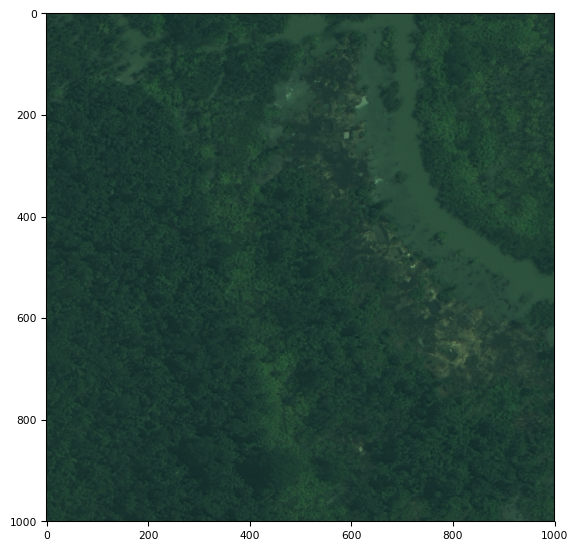

In [58]:
tiff.imshow(img_rgb[:1000,-1000:,:])

(<matplotlib.figure.Figure at 0x7fed45ba6550>,
 <matplotlib.image.AxesImage at 0x7fed4589be80>)

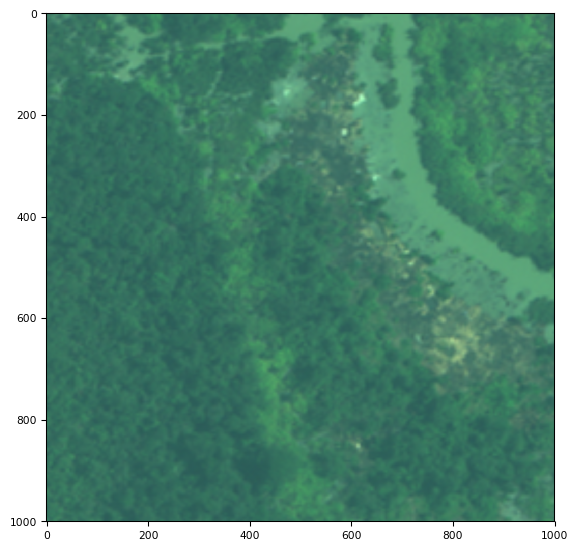

In [59]:
tiff.imshow(img_rgbn_scaled[:1000,-1000:,:3])

(<matplotlib.figure.Figure at 0x7fed459a61d0>,
 <matplotlib.image.AxesImage at 0x7fed457fec50>)

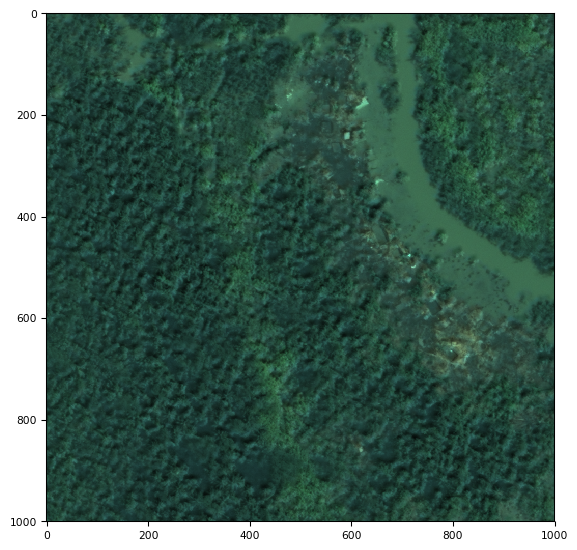

In [60]:
tiff.imshow(img_rgbn_sharpened[:1000,-1000:,:3])

(<matplotlib.figure.Figure at 0x7fed45a20fd0>,
 <matplotlib.image.AxesImage at 0x7fed457e2a90>)

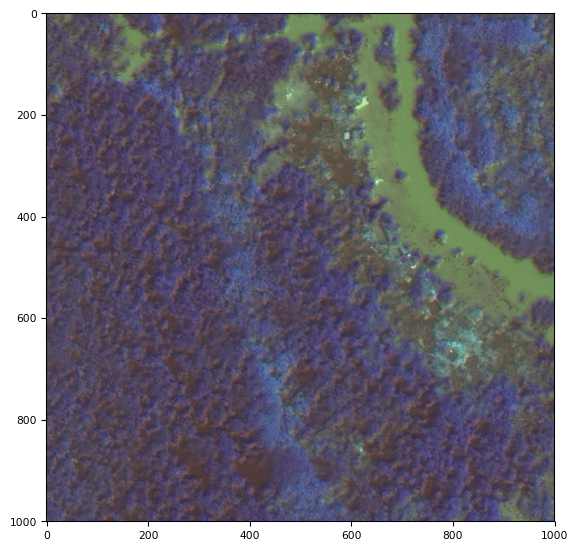

In [61]:
tiff.imshow(img_rest_sharpened[:1000,-1000:,:3])

In [24]:
a = np.array(np.ones((4,2)) + 0)
b = np.array(np.ones((4,2)) + 1)
c = np.array(np.ones((4,2)) + 2)
z = np.stack([a,b,c], axis=-1)

In [25]:
z

array([[[ 1.,  2.,  3.],
        [ 1.,  2.,  3.]],

       [[ 1.,  2.,  3.],
        [ 1.,  2.,  3.]],

       [[ 1.,  2.,  3.],
        [ 1.,  2.,  3.]],

       [[ 1.,  2.,  3.],
        [ 1.,  2.,  3.]]])

In [26]:
prod = np.full((4,2), 0.5)

In [27]:
prod

array([[ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5]])

In [29]:
z * np.expand_dims(prod, -1)

array([[[ 0.5,  1. ,  1.5],
        [ 0.5,  1. ,  1.5]],

       [[ 0.5,  1. ,  1.5],
        [ 0.5,  1. ,  1.5]],

       [[ 0.5,  1. ,  1.5],
        [ 0.5,  1. ,  1.5]],

       [[ 0.5,  1. ,  1.5],
        [ 0.5,  1. ,  1.5]]])